# Shopify Data Science Intern Challenge

## Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

<ol>
<li>Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.</li> 
<li>What metric would you report for this dataset?</li>
<li>What is its value?</li>
</ol>


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the Shopify dataset from CSV file
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


### Explore order value data

Given the abnormal average price of sneakers being $3145.13, we suspect that potential anomalies come from outliers. We have the <code>describe()</code> function to provide us valuable information to help us better understand the data.

In [3]:
# Statistic summary of order amount data
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

As we look from the statistic summary the minimum order amount is 90 and the maximum order amount is 704000. Extreme numbers are include in the data that cause the mean to rise in a large magnitude.

In [4]:
# Total value of purchased sneakers
data.order_amount.sum()

15725640

In [5]:
# Arbitrary Average Order Value
data.order_amount.sum()/data.total_items.count()

3145.128

We recognize that the average order value by using the wrong metric of the total number of sneaker shops instead of the total amount of items purchased. By calculating below we get $357.92, which is a more reasonable average order value.

In [6]:
# Determine Average Order Value
data.order_amount.sum()/data.total_items.sum()

357.92152221412965

Now we can use the <code>boxplot()</code> function to visually present the existence of possible outliers.

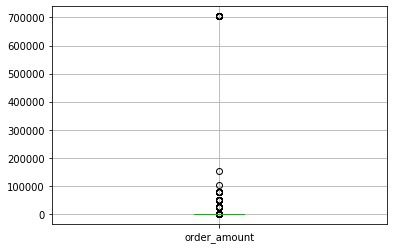

In [7]:
# Boxplot of the order amount
data.boxplot(column='order_amount')

From the boxplox we notice there are a few of outliers in our data.

By knowing that outliers exist, we have possible methods below to calculate the average order value:
<ol>
    <li>Treat the data assuming a normal distribution with no skewness would be the most straightforward way, which is $284.</li>
    <li>Divide the total order amount by the total amount of items purchased. From our calculation above we got \$357.92.</li>
    <li>Eliminate all the outliers in order to obtain a more reasonable average order value.</li>
</ol>

### Investigate other phenomenon in the data

As previously mentioned, outliers are the most interesting data points that we want to focus on.

We can calculate the inter quarltile range (IQR) to help us detect where the outliers locate.

In [8]:
Q1 = data.order_amount.quantile(0.25)
Q2 = data.order_amount.quantile(0.5)
Q3 = data.order_amount.quantile(0.75)
IQR = Q3 - Q1
IQR

227.0

In [9]:
# Use the IQR to determine the upper and lower bound
Outlier_min = Q1 - 1.5 * IQR
Outlier_max = Q3 + 1.5 * IQR
print(Outlier_min)
print(Outlier_max)

-177.5
730.5


In [10]:
# Extract outliers above $730.5
Outlier_data = data[data['order_amount'] > 730.5]
Outlier_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
99,100,18,752,780,5,cash,2017-03-06 23:41:16
136,137,15,961,765,5,credit_card,2017-03-26 5:06:46
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
...,...,...,...,...,...,...,...
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4927,4928,74,849,765,5,cash,2017-03-28 6:55:57
4952,4953,26,786,880,5,cash,2017-03-17 1:50:18
4958,4959,70,711,865,5,credit_card,2017-03-08 17:22:51


Looking at our outliers, we observe that both shop 42 and shop 78 has large transactions going on.

In [11]:
Shop_42 = data[data['shop_id'] == 42]
Shop_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


From the transactions in shop 42, for example we discover that on 2017-03-28 at 4:00:00 there are credit card transctions of 704000 dollars for 20 total items from the same user id. This is something suspicious that we should look into. 

In [12]:
Shop_78 = data[data['shop_id'] == 78]
Shop_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


From the transactions in shop 78, we detect very high order amounts for only few items. This occurrence may feel peculiar that needs to be inspected.

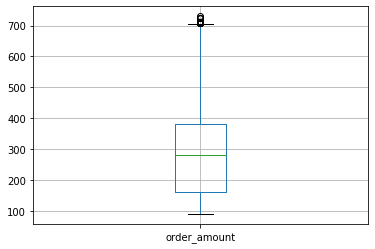

In [13]:
# Cleaning up the outliers
new_data = data[(data.order_amount < Q3 + IQR * 1.5) & (data.order_amount > Q1 - IQR * 1.5)]
new_data.boxplot(column='order_amount')

From the boxplot above we see that the outliers are excluded from the original dataset.

In [14]:
new_data.order_amount.describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

Again we use the <code>describe()</code> to summarize the statistic overview. Our average order value ends up to be $280.

### Conclusion Statement
Overall from above we can say one of the possible average order values is $357.92 since we figured out that the amount of shops was used as the divisor instead of the amount of purchased items. However, potential anomalies can also be caused due to various reasons including credit card transaction fraud etc. Comparing to the mean, the median would be a more accurate value in this case since large data values affects the mean but not the median when the amount of data and the 50th percentile remains constant. 

## Question 2: For this question you’ll need to use SQL

Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### a. How many orders were shipped by Speedy Express in total?

In order to find the total number of orders shipped by Speedy Express, we join the <code>Orders</code> and <code>Shippers</code> tables with the <code>Shipper_ID</code>, then count the entries of Speedy Express.

<code>SELECT COUNT(OrderID) FROM Orders
LEFT JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';</code>

Using the query above, we get that 54 orders were shipped by Speedy Express.

### b. What is the last name of the employee with the most orders?

Since the question asks for the last name of the employee with the most order, this means we need to compare the amount of orders from each employee. Therefore, the <code>GROUP BY</code> statement is required for the join query to count the entries for each employee. Use the <code>JOIN</code> keyword with the <code>EmployeeID</code>.

<code>SELECT COUNT(Orders.EmployeeID), Employees.LastName
FROM Orders
RIGHT JOIN Employees
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY COUNT(Orders.EmployeeID) DESC;</code>

Using the query above, we get that Peacock is the last name of the employee with the most orders of 40.

### c. What product was ordered the most by customers in Germany?

The data we need to solve this problem involves with numerous different tables. So we will be using a few <code>JOIN</code> keywords in the query. To obtain the product name with the most amount of order, we need to pull out the quantity order of each product and compare them using the <code>GROUP BY</code> statement. Since Germany is the given condition, we can start from joining the <code>Customer</code> and <code>Orders</code> tables with <code>CustomerID</code>. We then keep joining each table with its common columns until we join <code>OrderDetails</code> and <code>Products</code> with <code>ProductID</code>.

<code>SELECT SUM(OrderDetails.Quantity), Products.ProductName
FROM ((Customers
INNER JOIN Orders
ON Customers.CustomerID = Orders.CustomerID)
INNER JOIN OrderDetails
ON Orders.OrderID = OrderDetails.OrderID)
INNER JOIN Products
ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.Country = 'Germany'
GROUP BY Products.ProductName
ORDER BY SUM(OrderDetails.Quantity) DESC;</code>

Using the query above, Boston Crab Meat was ordered the most in total of 160 by Germany customers.